# Explore here

### Paso 1: Planteamiento del problema y recopilación de datos

In [2]:
# Define los datos


########################################
import pandas as pd
url="../data/raw/AB_NYC_2019.csv"
data = pd.read_csv(url)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 2: Exploración y limpieza de datos

In [3]:
# Obtener las dimensiones
data.shape

(48895, 16)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
nan = data.isna().sum()
nan

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- Existen un total de 48895 filas (en este caso, reservas de airbnb) y 15 columnas, de entre las que encontramos el objetivo o clase a predecir, `price`.
- La variable `las_review` y `reviews_per_month` tiene 38843 instancias con valores, por lo que contendría más de 10000 valores nulos. El resto de variables cuentan siempre con valor.
- Los datos cuentan con 10 características numéricas y 2 características categóricas (room_type y availability_365).


#### Eliminar duplicados
Se decide eliminar el name y el host_name, ya que se observa que hay algunos que son NaN y nos interesa que haya un identificador.

In [6]:
nan_percentage = data.isna().mean()*100
# Identificar las columnas con más del 90% de NaN
columns_to_drop = nan[nan_percentage > 90].index
print(columns_to_drop)
# Eliminar las columnas
data_cleaned = data.drop(columns=columns_to_drop, axis=1)
# eliminar los ids, porque sino va a dar problemas
# obviar la parte de categórica - categórica, ya que no tendría sentido hacer las tablas con las predictoras ya que sería muchas gráficas
# En es parte obviarla y el análisis sería de numérica-categórica
data

Index([], dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
data = data.drop(["id", "host_id", "name","host_name", "latitude", "longitude"], axis = 1)
# eliminar los ids, porque sino va a dar problemas
# obviar la parte de categórica - categórica, ya que no tendría sentido hacer las tablas con las predictoras ya que sería muchas gráficas
# En es parte obviarla y el análisis sería de numérica-categórica
data

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, se hubiera igualado la función de `drop_duplicates()` a la variable `data` que almacena los datos.

In [8]:
data.duplicated().sum()

np.int64(940)

Dos filas que tienen los mismos valores en todas las columnas excepto en 'Id', se mantendrá solo una de esas filas. Observamos que no se elimina ningún duplicado. Además, se debe mencionar que son reservas de estancias en Airbnb por lo que una vivienda puede tener más de una reserva.

In [9]:
data = data.drop_duplicates(subset = data.columns.difference(["id"]))
print(data.shape)
data.head()

(47955, 10)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Excluiríamos de nuevo la columna identificativa, aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis:

In [10]:
if data.duplicated().sum():
    data = data.drop_duplicates()
print(data.shape)
data.head()

(47955, 10)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Eliminar información irrelevante

Cuando queremos preparar los datos para entrenar un modelo predictivo, debemos responder a la siguiente pregunta: ¿son todas las características imprescindibles para realizar una predicción? Normalmente, esa pregunta es un rotundo no. Tenemos que tratar de ser lo más objetivos posible y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto, aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que podemos estar seguros de que el algoritmo no va a utilizar en el proceso predictivo, estas son `last_review` y `reviews_per_month` (lo dejo por si acaso).

In [11]:

data.drop(["last_review"], axis = 1, inplace = True)
data.head()

C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\2234885328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["last_review"], axis = 1, inplace = True)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [12]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,47955.000000,47955.000000,47955.000000,38837.000000,47955.000000,47955.000000
mean,153.011407,7.059889,23.730560,1.373364,7.099343,113.999437
std,241.868247,20.668054,44.864674,1.680524,32.938841,131.541175
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,107.000000,3.000000,6.000000,0.720000,1.000000,49.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,230.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc, pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores. En este caso, las variables categóricas son `neighbourhood_group`,`neighbourhood`, `room_type`, `availability_365`.

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Busqueda Recursiva de todas las columnas
# for col in data:
#     sns.histplot(x=col,data=data,kde=True)
#     plt.tight_layout()
#     plt.show()

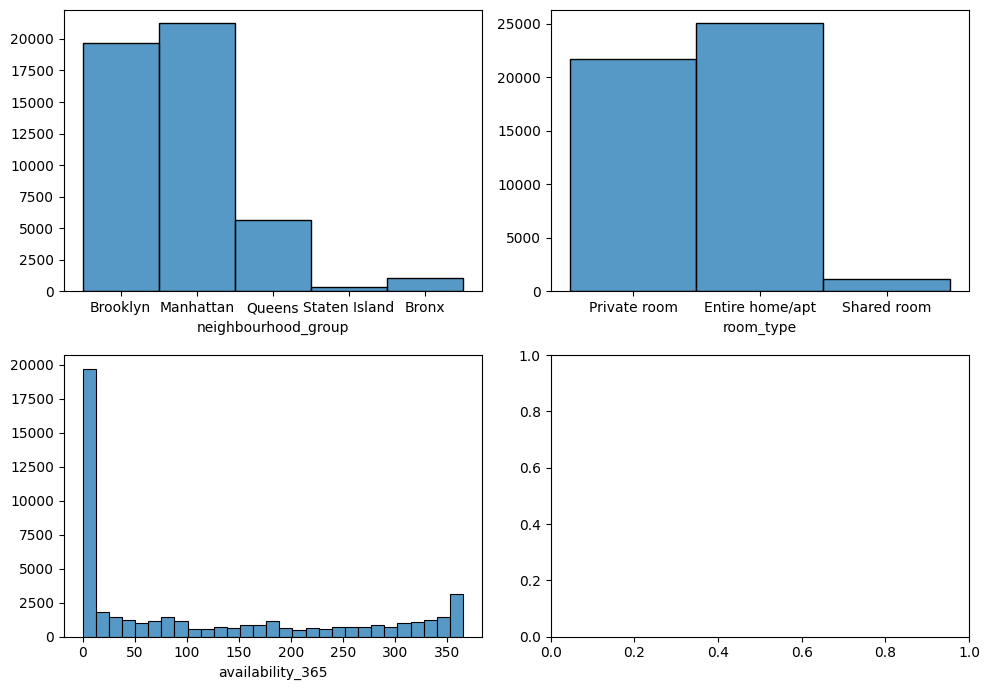

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = data, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "availability_365").set(ylabel = None)
# Se quita porque ya hay una relación con neighbourhood_group que sería lo mismo
#sns.histplot(ax = axis[1, 1], data = data, x = "neighbourhood").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- neighbourhood_group: Se observa que más de 40.000 reservas se producen en Brooklyn y Manhattan (más de 20K cada uno).
- room_type: Se observa que gran parte de las reservas se hace en habitaciones privadas o apartamentos enteros.
- availability_365: Se observa que 20.000 reservas tienen entre 0-10 dias disponibles.El resto de reservas tiene unos valores relativamente uniformes.

#### Análisis sobre variables numéricas

Antes de comenzar a graficar, debemos identificar cuáles son las numéricas, que son `price`, `minimum_nights` y `number_of_reviews`, `reviews_per_month`,`calculated_host_listings_count`, `availability_365`. Se procede a graficar las gráficas:

In [15]:
# fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# # Crear una figura múltiple con histogramas y diagramas de caja
# sns.histplot(ax = axis[0, 0], data = data, x = "price").set(xlabel = None)
# sns.boxplot(ax = axis[1, 0], data = data, x = "price")
# sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set(xlabel = None, ylabel = None)
# sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights")

# # Ajustar el layout
# plt.tight_layout()

# # Mostrar el plot
# plt.show()

Se grafica de forma automática las variables numéricas, se excluyen "id" y "host_id"
- price
- minimum_nights
- number_of_reviews 
- reviews_per_month
- calculated_host_listings_count
- availability_365 

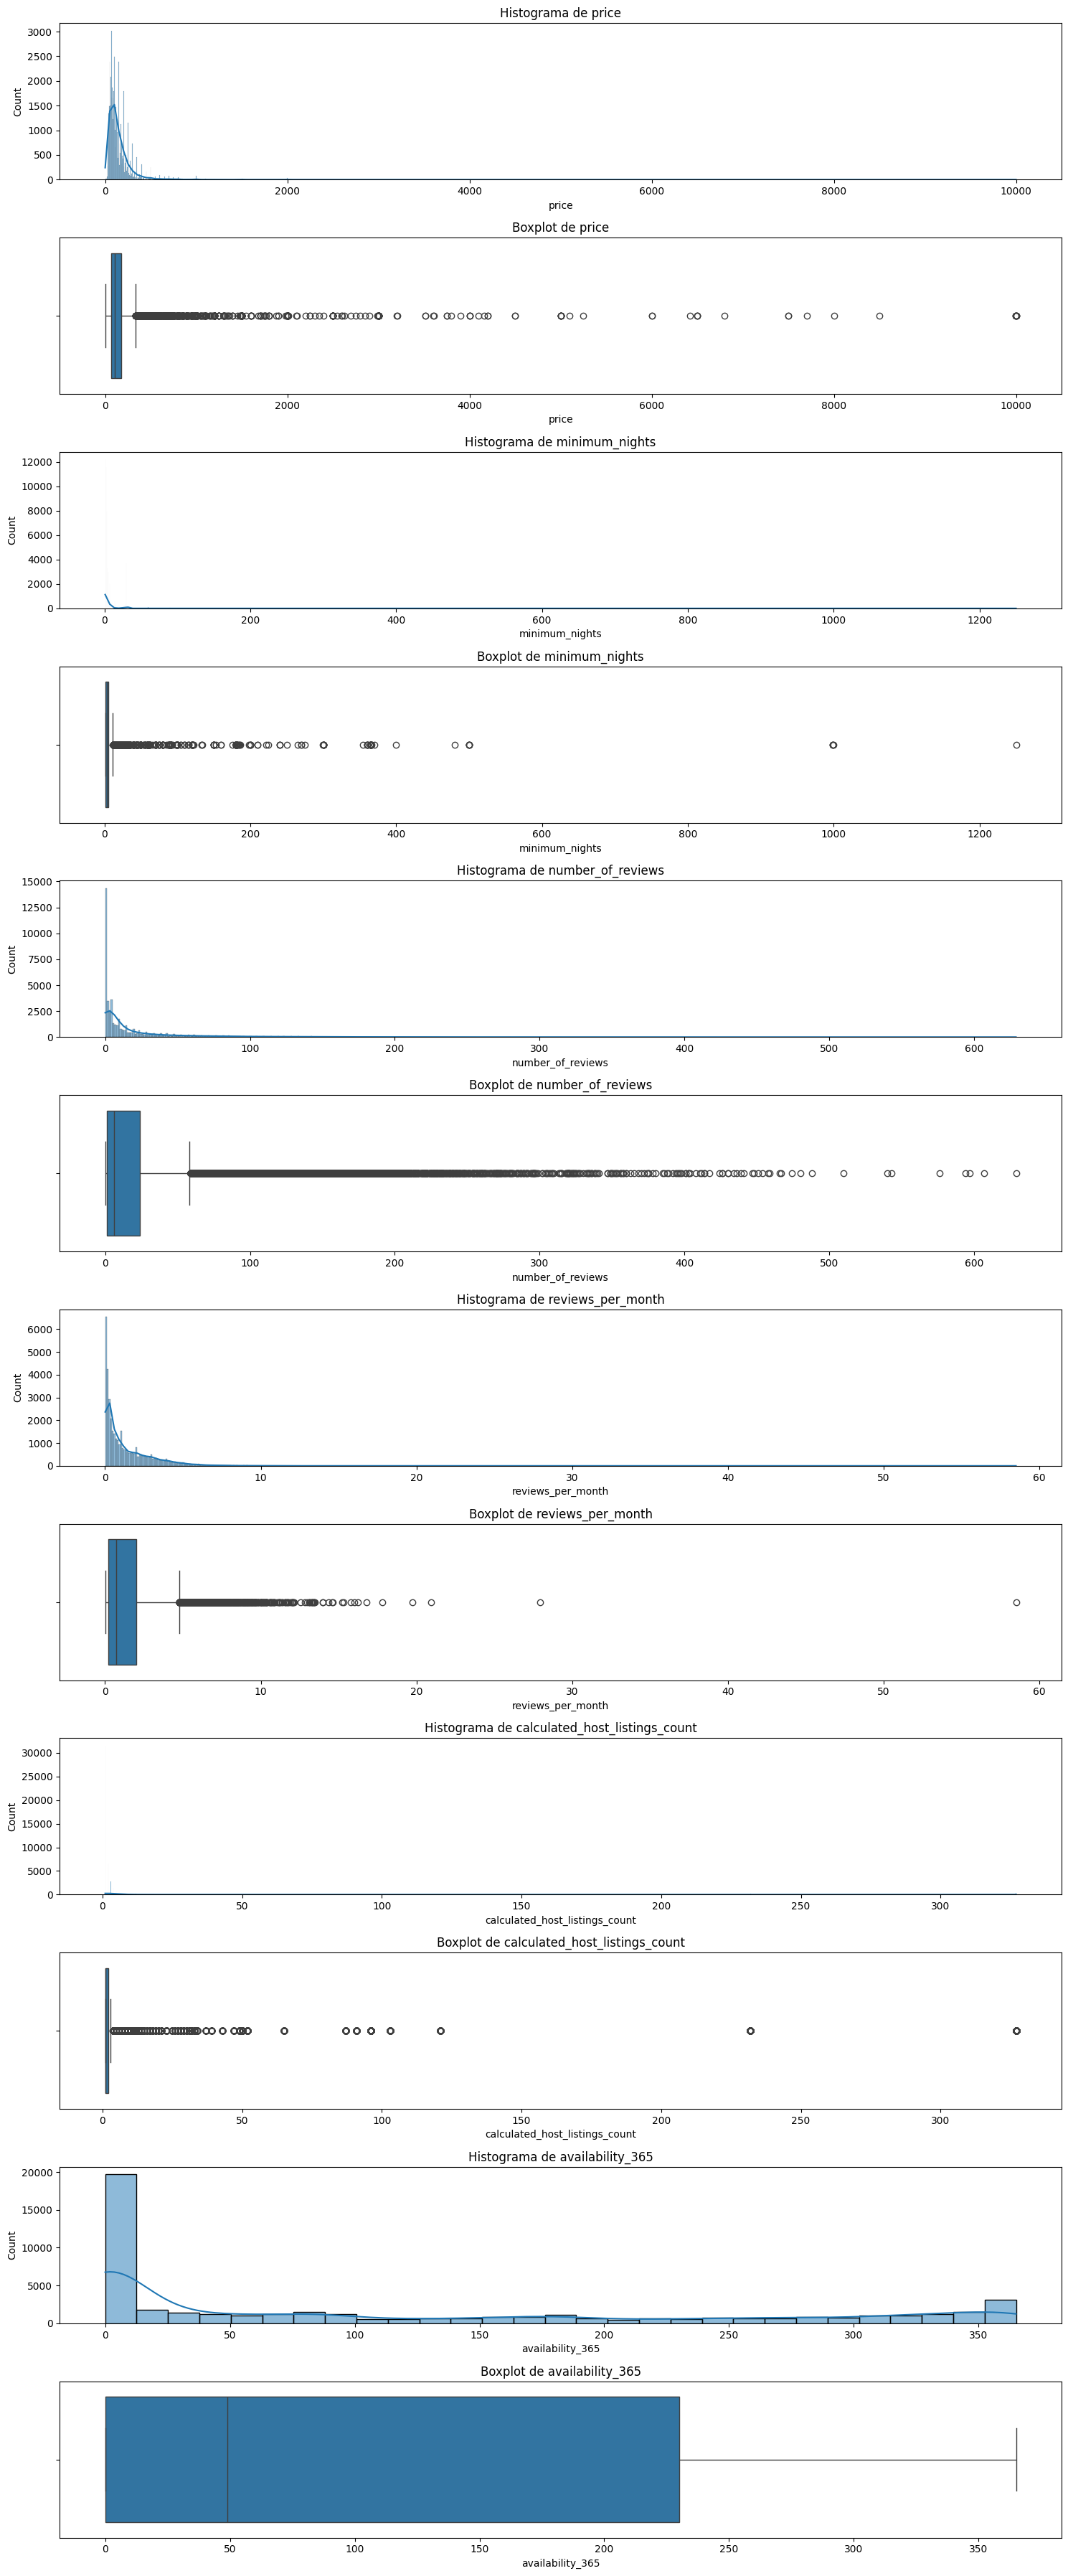

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# SOLO MODIFICAR COLUMNAS QUE SE QUIERAN EXCLUIR DE LAS NUMERICAS
column_filter= data.select_dtypes(include='number').drop(columns=['id','host_id'], errors='ignore').columns
# Crear la figura con 2 columnas y una fila por variable
fig, axes = plt.subplots(len(column_filter)*2, 1, figsize=(15, len(column_filter) * 6))

# Iterar sobre cada columna del DataFrame
for i, col in enumerate(column_filter):
    idx=i*2
    # Histograma en la primera fila
    sns.histplot(data=data, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histograma de {col}')
    

    # Boxplot en la segunda fila
    sns.boxplot(data=data, x=col, ax=axes[idx+1])
    axes[idx+1].set_title(f'Boxplot de {col}')
    

# Ajustar diseño
plt.tight_layout()
plt.show()

- price: La mayoria de los precios se encuentran entre 0-500$.
- minimum_nights: Los outliers y la concentración de los datos en los primeros valores impiden extraer mucho más.
- number_of_reviews: Tiene valores atípicos que están lejos de la distribución estándar y su distribución es ligeramente asimétricas pero cercana a una distribución normal totalmente sesgada hacia la izquierda, donde la moda es inferior a la media.
- reviews_per_month: Tiene valores atípicos que están lejos de la distribución estándar y su distribución es ligeramente asimétricas pero cercana a una distribución normal totalmente sesgada hacia la izquierda, donde la moda es inferior a la media.
- calculated_host_listings_count: Tiene valores atípicos que están lejos de la distribución estándar y su distribución es ligeramente asimétricas pero cercana a una distribución normal totalmente sesgada hacia la izquierda, donde la moda es inferior a la media.
- availability_365: aproximadamente el 35% de los valores toman el valor 0. Se puede considerar un outlier. El resto de datos se encuentran de forma uniforme.

La combinación de los dos gráficos anteriores nos permite conocer la distribución y sus características estadísticas. De la visualización resultante podemos ver que ambas variables tienen valores atípicos que están lejos de la distribución estándar y que sus distribuciones son ligeramente asimétricas pero cercanas a una distribución normal; todas totalmente sesgadas hacia la izquierda.

### Paso 4: Análisis de variables multivariante

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no son críticos para averiguar el precio de un alquiler. Por ejemplo, la variable `reviews_per_month` tiene muchos valores nulos, y tendríamos que asegurar que no hay relación entre ella y el precio antes de eliminarla, ya que quizá pudiera ser muy significativa e importante para el modelo y su presencia podría decantar la predicción.

#### Análisis numérico-numérico
Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.
##### Price - (minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365)
Excluir la columna price del column filter porque sino se compara consigo misma.


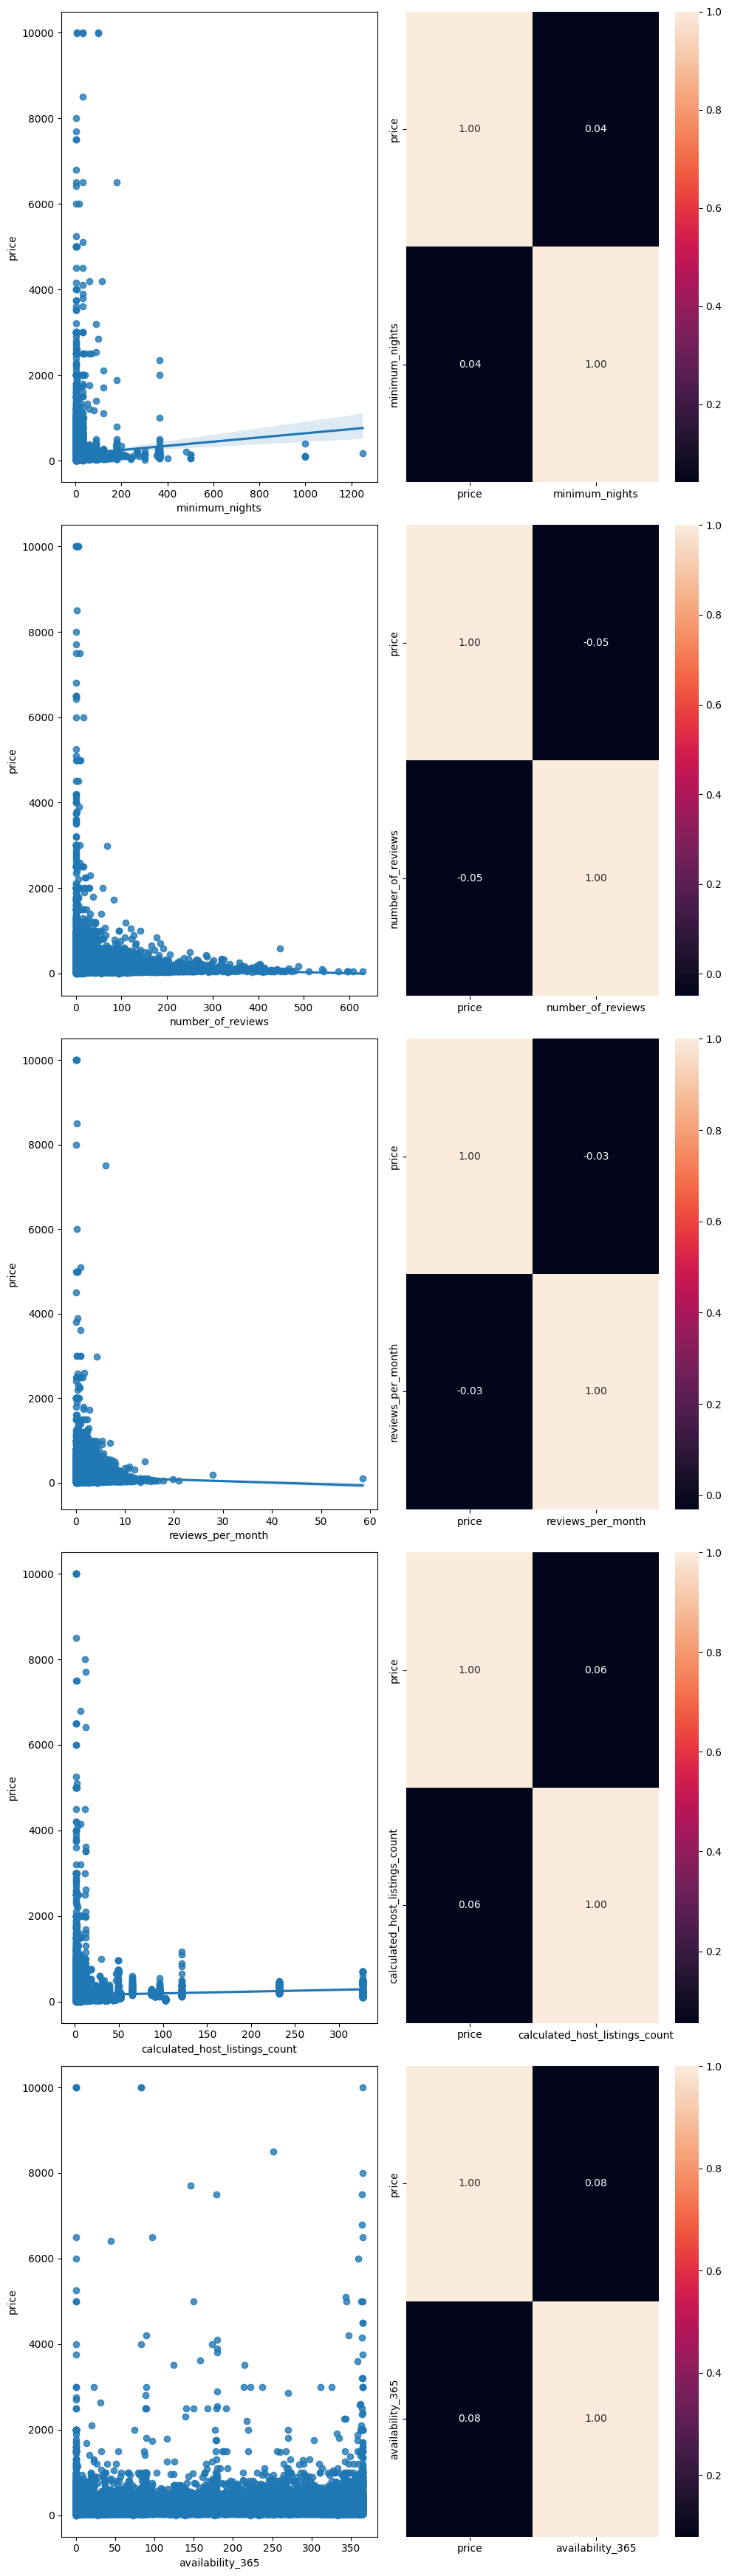

In [17]:
# Automatizado para solo filtrar los numericos a numericos y excluir que  se compare el objetivo o clase a predecir, es decir, price consigo mismo
column_filter= data.select_dtypes(include='number').drop(columns=['price'], errors='ignore').columns
fig, axis = plt.subplots(len(column_filter), 2, figsize = (10, 7*(len(column_filter))))

# Crear un diagrama de dispersión múltiple
for i,col in enumerate(column_filter):
    sns.regplot(ax = axis[i, 0], data = data, x = col, y = "price")
    sns.heatmap(data[["price", col]].corr(), annot = True, fmt = ".2f", ax = axis[i,1], cbar = True)
    # sns.regplot(ax = axis[idx+2], data = data, x = col, y = "price").set(ylabel=None)
    # sns.heatmap(data[["price", col]].corr(), annot = True, fmt = ".2f", ax = axis[idx+3])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se observa que el precio tenga una correlación con ninguna variable, pero se considera que es debido a la cantidad en los outliers (se podría ver si eliminandolos mejora la correlación).
En resumen, no existe relación con estas características frente a la predictora, la significancia no es muy elevada, no siendo factores decisivos sobre el precio de un alquiler.

#### Análisis categórico-categórico 

`price` -> `neighbourhood_group`,`neighbourhood`, `room_type`, `availability_365`

C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\2186139419.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\mamen\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


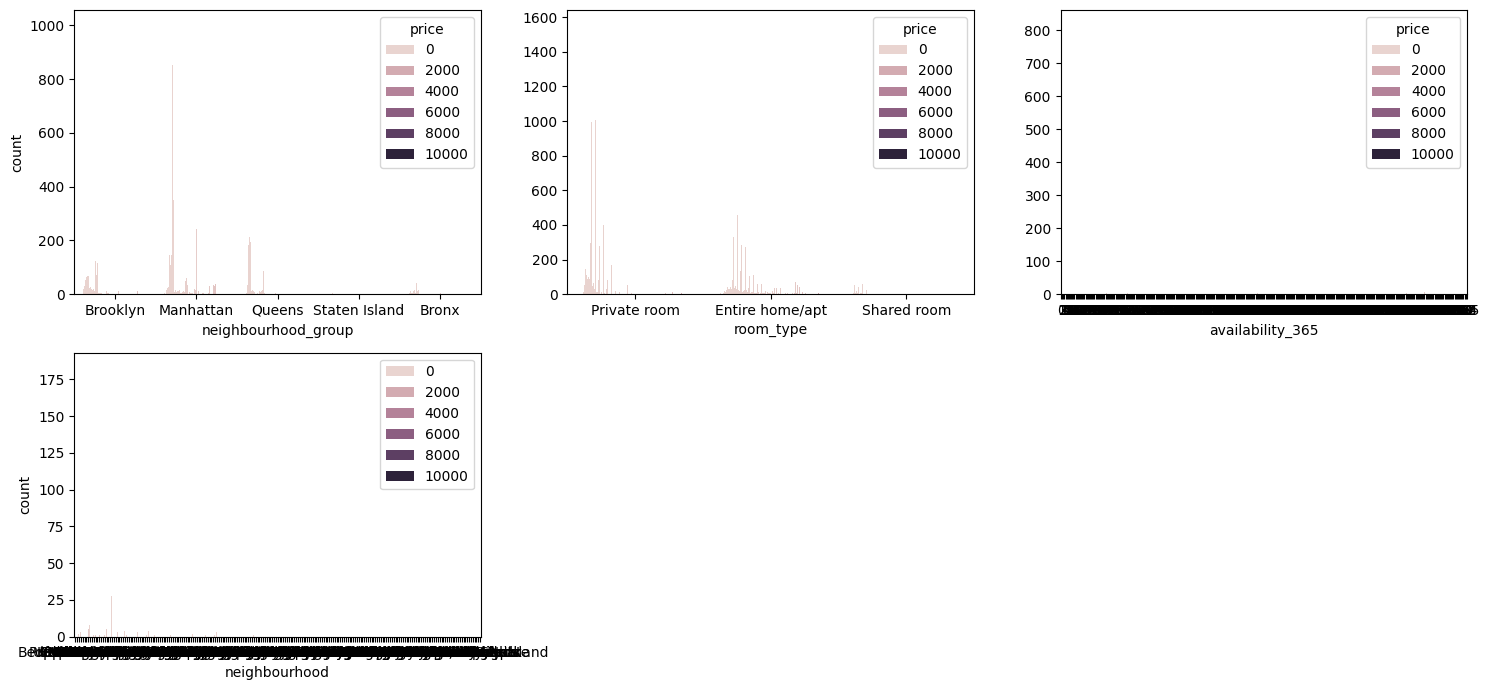

In [18]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0,0], data = data, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[0,1], data = data, x = "room_type", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[0,2], data = data, x = "availability_365", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[1,0], data = data, x = "neighbourhood", hue = "price")
fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])
plt.legend(loc="upper right")
plt.tight_layout()

plt.show()

Del gráfico anterior podemos obtener las siguientes conclusiones:
***


##### Combinaciones de la clase con varias predictoras

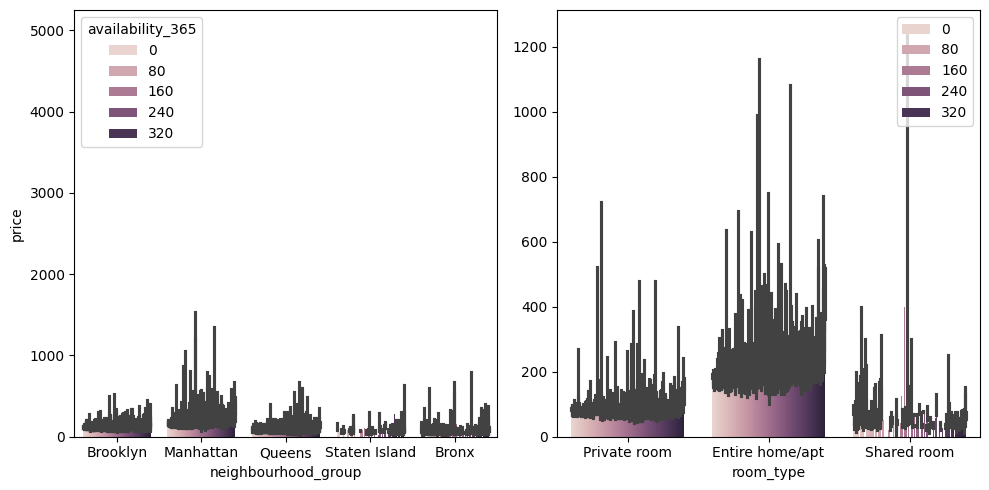

In [19]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data, x = "neighbourhood_group", y = "price", hue = "availability_365")
sns.barplot(ax = axis[1], data = data, x = "room_type", y = "price", hue = "availability_365").set(ylabel = None)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


Del primer gráfico, se observa que Manhattan tiene los precios más altos y más dispersos, mientras que Staten Island y Bronx tienen precios más bajos en general. Por otro lado, del segundo gráfico, los apartamentos enteros tienen precios más altos y con mayor variabilidad; las habitaciones privadas y compartidas son más baratas en comparación. Se observa en ambas gráficas que hay mucha disponibilidad de alquileres.


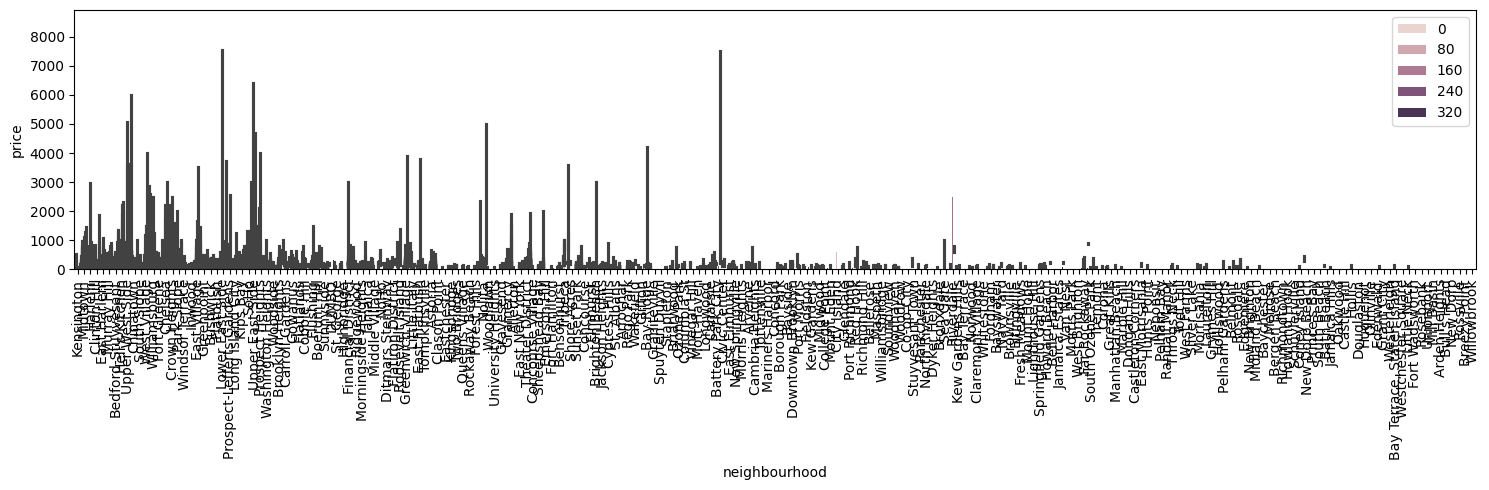

In [20]:
fig, axis = plt.subplots(figsize = (15, 5))
sns.barplot(data = data, x = "neighbourhood", y = "price", hue = "availability_365")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Se observa que algunos barrios de NYC tienen un precio muy elevado para alquilar.

##### Análisis de correlaciones

El objetivo del análisis de correlaciónes con datos categóricos-categóricos es descubrir patrones y dependencias entre variables, lo que ayuda a entender cómo interactúan dentro de un conjunto de datos. Este análisis es fundamental en diversos campos como ciencias sociales, investigación de mercado y epidemiología, donde los datos categóricos a menudo representan atributos clave de interés.

Este análisis tiene como objetivo determinar si y cómo las categorías de una variable están relacionadas con las categorías de otra.

In [21]:
## Almacenar los valores en un diccionario, para utilizarlo cuando entremos en producción con el modelo
# neighbourhood_group
data["neighbourhood_group_number"] = pd.factorize(data["neighbourhood_group"])[0]

neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_number"] for _, row in data[["neighbourhood_group", "neighbourhood_group_number"]].drop_duplicates().iterrows()}
# room_type
data["room_type_number"] = pd.factorize(data["room_type"])[0]

room_type_transformation_rules = {row["room_type"]: row["room_type_number"] for _, row in data[["room_type", "room_type_number"]].drop_duplicates().iterrows()}
# neighbourhood
data["neighbourhood_number"] = pd.factorize(data["neighbourhood"])[0]

neighbourhood_transformation_rules = {row["neighbourhood"]: row["neighbourhood_number"] for _, row in data[["neighbourhood", "neighbourhood_number"]].drop_duplicates().iterrows()}
# diccionario

import json
# neighbourhood_group
with open("neighbourhood_group_transformation_rules.json", "w") as f:
  json.dump(neighbourhood_group_transformation_rules, f)
# room_type
with open("room_type_transformation_rules.json", "w") as file:
  json.dump(room_type_transformation_rules, file)
# neighbourhood
with open("neighbourhood_transformation_rules.json", "w") as file:
  json.dump(neighbourhood_transformation_rules, file)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:
# neighbourhood_group
with open("neighbourhood_group_transformation_rules.json", "r") as f:
  neighbourhood_group_transformation_rules = json.load(f)

data["neighbourhood_group_number"] = data["neighbourhood_group"].apply(lambda x: neighbourhood_group_transformation_rules[x])
# room_type
with open("room_type_transformation_rules.json", "r") as file:
  room_type_transformation_rules = json.load(file)

data["room_type_number"] = data["room_type"].apply(lambda x: room_type_transformation_rules[x])
# neighbourhood
with open("neighbourhood_transformation_rules.json", "r") as file:
  neighbourhood_transformation_rules = json.load(file)

data["neighbourhood_number"] = data["neighbourhood"].apply(lambda x: neighbourhood_transformation_rules[x])

# INVESTIGAR: ONE HOT ENCODING

C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\3122694760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["neighbourhood_group_number"] = pd.factorize(data["neighbourhood_group"])[0]
C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\3122694760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["room_type_number"] = pd.factorize(data["room_type"])[0]
C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\3122694760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [22]:
data

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_number,room_type_number,neighbourhood_number
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,0,0,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,1,1,1
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365,1,0,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,0,1,3
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9,0,0,6
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36,0,0,21
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27,1,1,2
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2,1,2,7


C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\2163899883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["neighbourhood_group_number"] = pd.factorize(data["neighbourhood_group"])[0]
C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\2163899883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["room_type_number"] = pd.factorize(data["room_type"])[0]
C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\2163899883.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

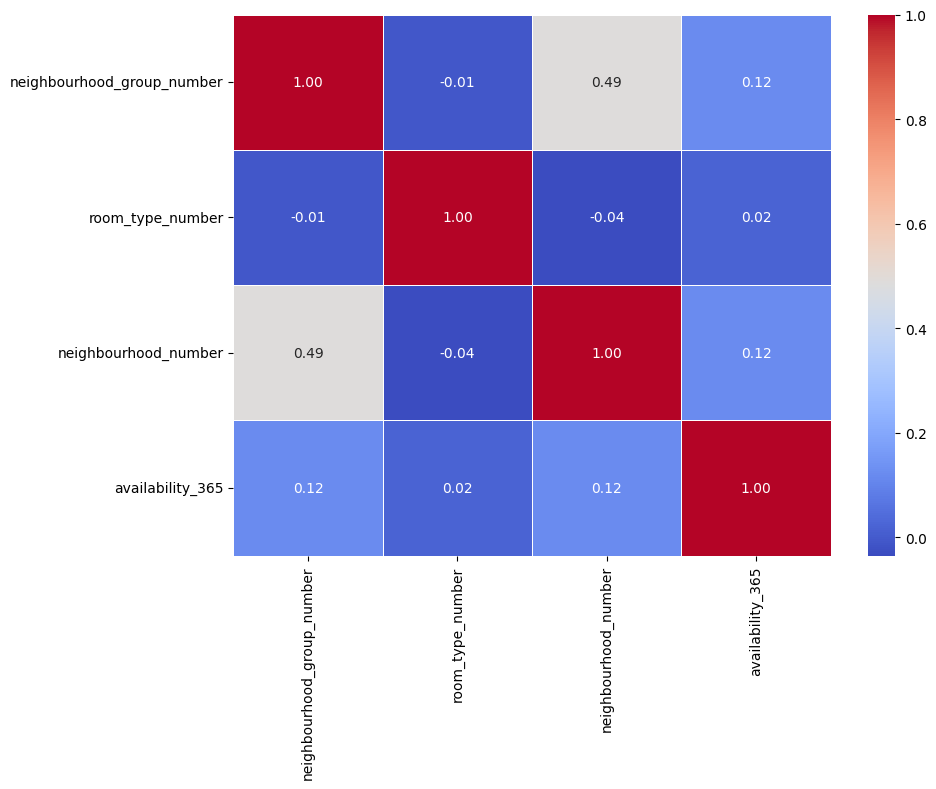

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

data["neighbourhood_group_number"] = pd.factorize(data["neighbourhood_group"])[0]
data["room_type_number"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_number"] = pd.factorize(data["neighbourhood_number"])[0]

corr_matrix = data[["neighbourhood_group_number","room_type_number", "neighbourhood_number","availability_365"]].corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.tight_layout()

plt.show()

#### Análisis numérico-categórico (completo)
Se ha ido haciendo, ya que el precio es una variable numérica y no categórica por lo que el análisis categórico-categórico no tenía sentido en este análisis.


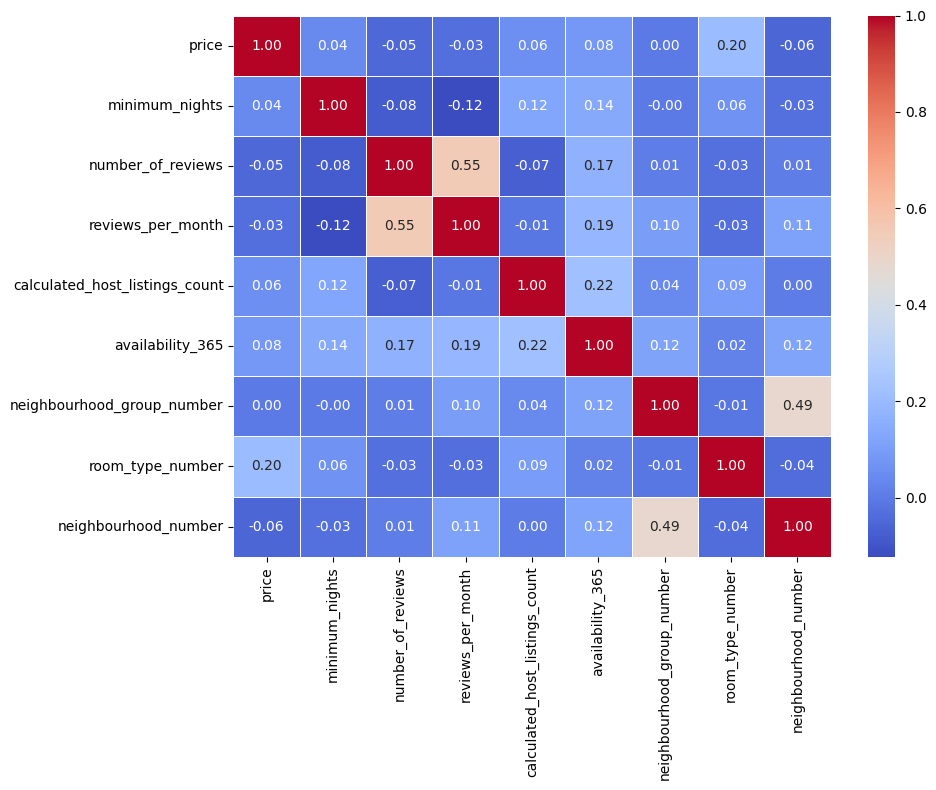

In [24]:
corr_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.tight_layout()

plt.show()

El análisis de correlaciones refleja una fuerte relación directa entre el tipo de habitación (`room_type`) de la reserva y su precio. Además, se aprecia una relación entre el número de de días disponibles que se encuentra el alquiler de el número de noches, número de reseñas, reseñas por mes y cuantas propiedades tiene el host listadas (variables `minimum_nights`, `number_of_reviews`, `reviews_per_month` y `calculated_host_listings_count`, respectivamente). El resto de las correlaciones son débiles y no son tan significativas como para contemplarlas en el análisis.

Finalmente, para cerrar el estudio multivariante queda analizar la relación entre las variables categóricas y numéricas.

Como se ha visto previamente se observa una correlación entre el room_type y el price. Las altas correlaciones entre number_of_reviews y reviews_per_month; así como neighbourhood_group y neighbourhood son normales y tienen sentido ya que dependen una de la otra. `availability_365` tiene cierta relación con `calculated_host_listings_count`, es posible que los anfitriones con más propiedades listadas tienden a tener una mayor disponibilidad en los alojamientos, posiblemente porque las tengan activas más días

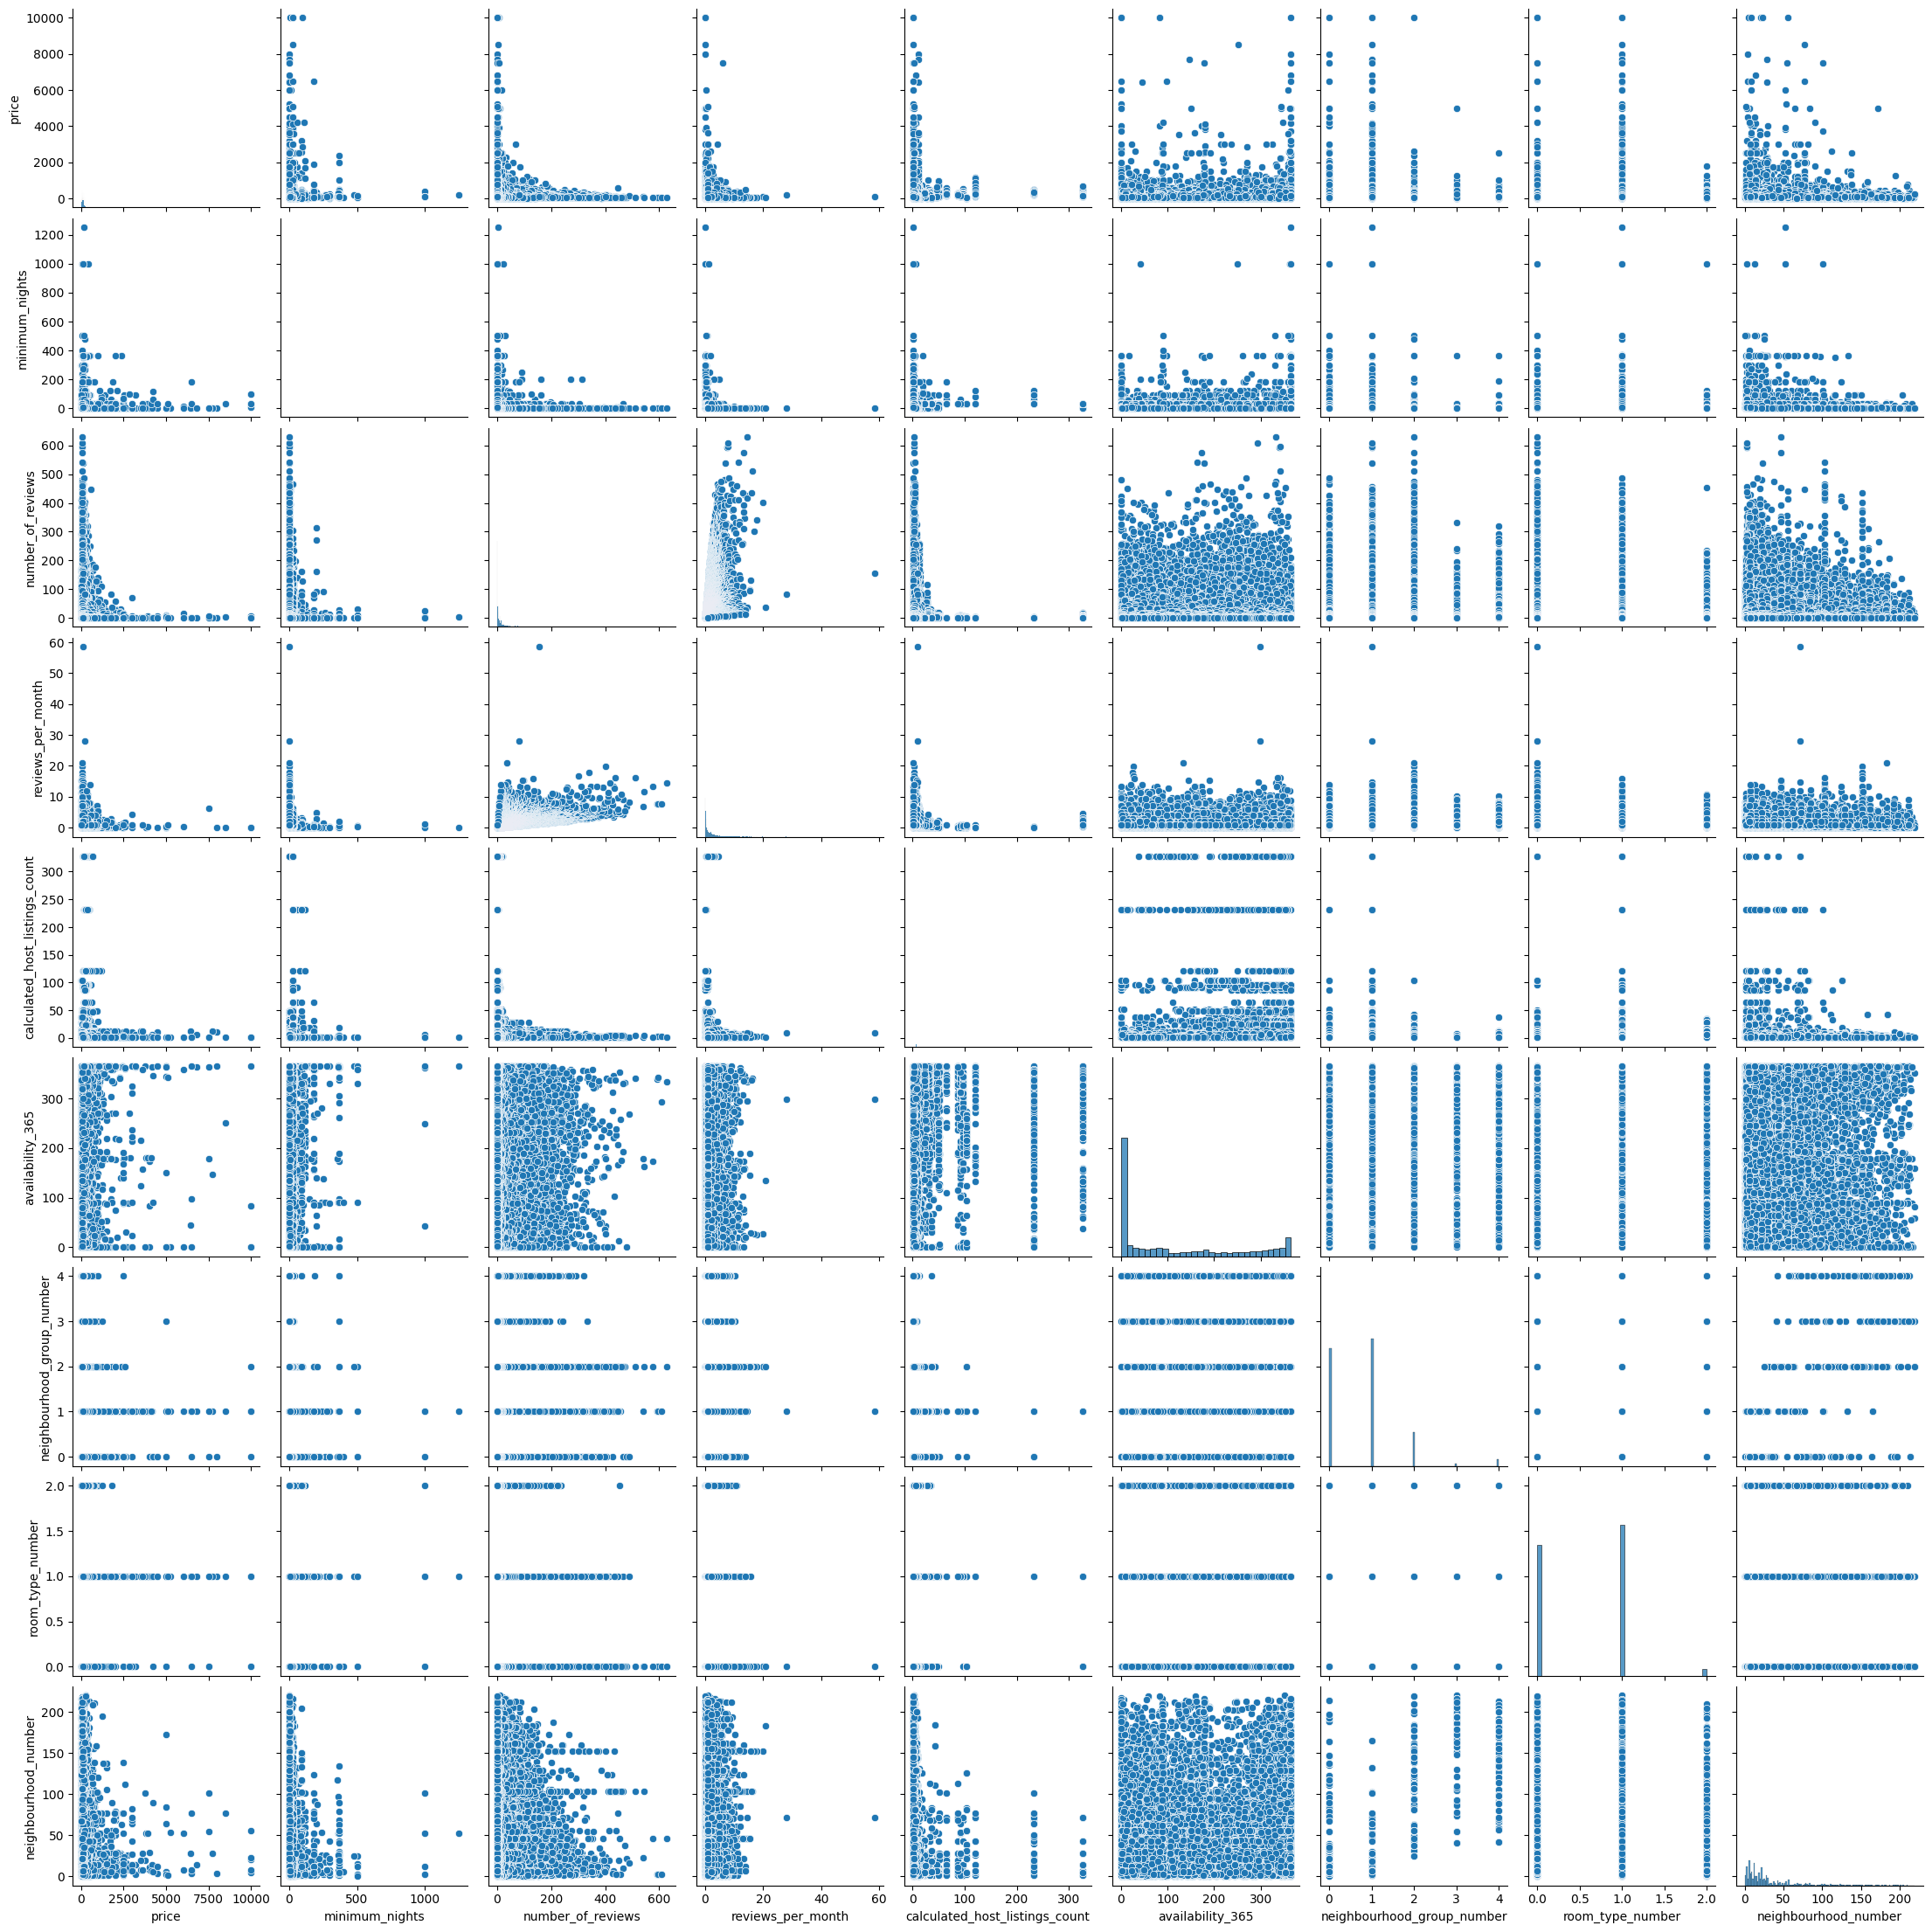

In [25]:
sns.pairplot(data = data)

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [27]:
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_number', 'room_type_number',
       'neighbourhood_number'],
      dtype='object')

In [26]:
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_number,room_type_number,neighbourhood_number
count,47955.000000,47955.000000,47955.000000,38837.000000,47955.000000,47955.000000,47955.000000,47955.000000,47955.000000
mean,153.011407,7.059889,23.730560,1.373364,7.099343,113.999437,0.791242,0.570180,30.139923
std,241.868247,20.668054,44.864674,1.680524,32.938841,131.541175,0.847769,0.541103,34.875318
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000,8.000000
50%,107.000000,3.000000,6.000000,0.720000,1.000000,49.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,230.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.000000,220.000000


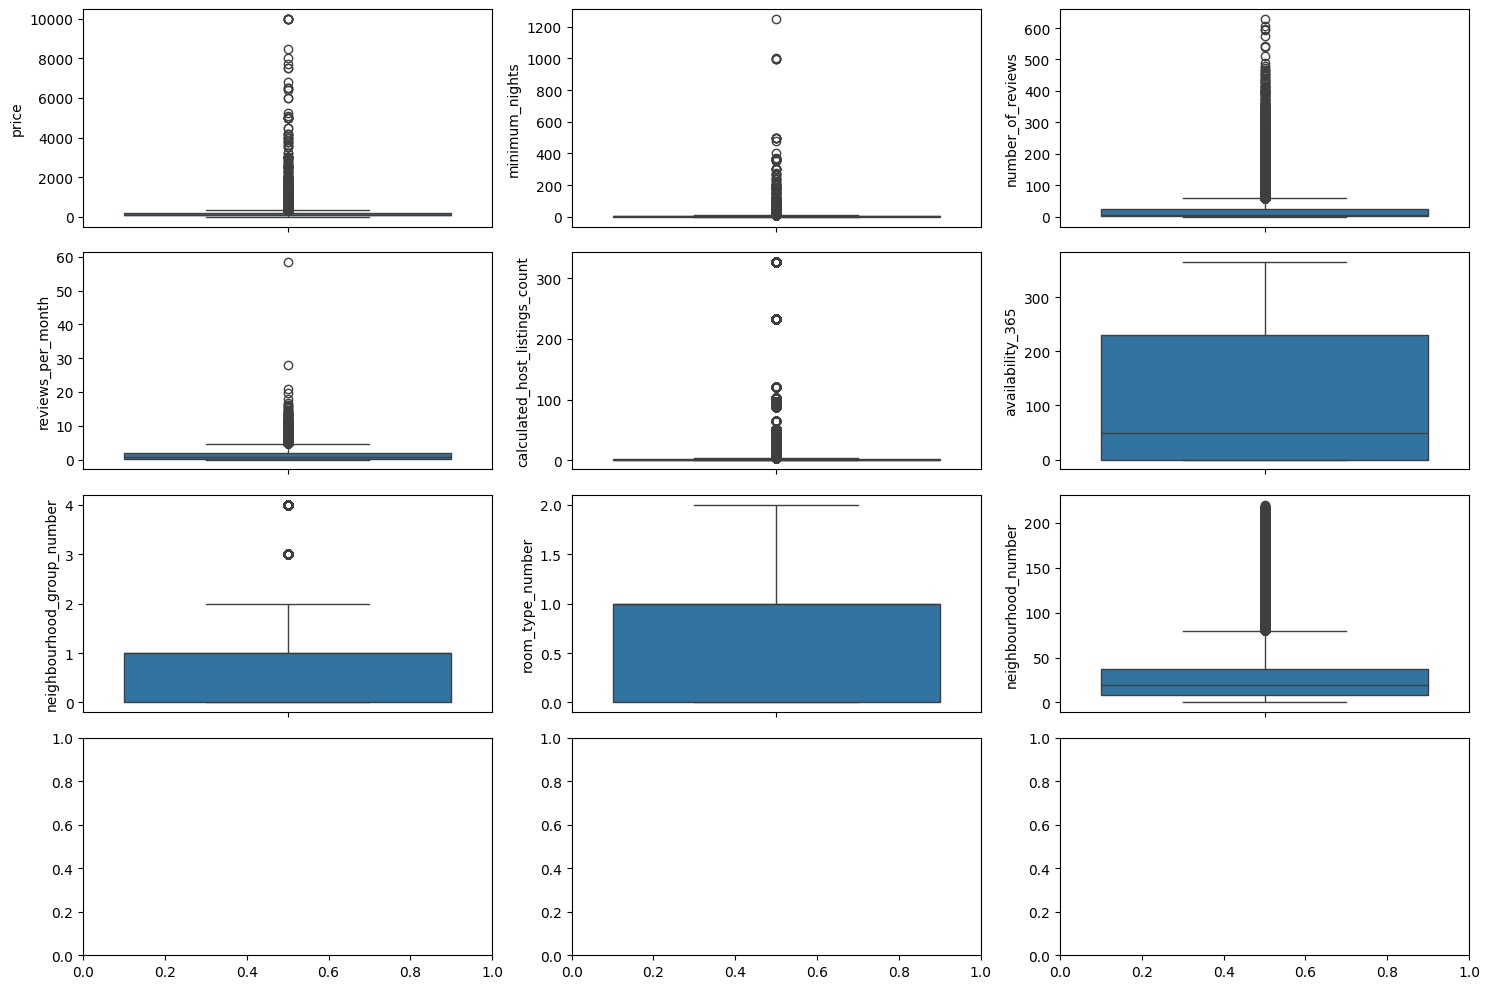

In [29]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "price")
sns.boxplot(ax = axis[0, 1], data = data, y = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 0], data = data, y = "reviews_per_month")
sns.boxplot(ax = axis[1, 1], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 2], data = data, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = data, y = "neighbourhood_group_number")
sns.boxplot(ax = axis[2, 1], data = data, y = "room_type_number")
sns.boxplot(ax = axis[2, 2], data = data, y = "neighbourhood_number")

plt.tight_layout()

plt.show()

Antes de dividirlo no debe de haber nans en el dataframe.

In [36]:
import json

total_data_con_outliers = data.copy()
total_data_sin_outliers = data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["price","minimum_nights","number_of_reviews","reviews_per_month", "calculated_host_listings_count","neighbourhood_number"]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)
outliers_dict

{'price': [np.float64(-90.0), np.float64(334.0)],
 'minimum_nights': [np.float64(-5.0), np.float64(11.0)],
 'number_of_reviews': [np.float64(-33.5), np.float64(58.5)],
 'reviews_per_month': [np.float64(-2.555), np.float64(4.765000000000001)],
 'calculated_host_listings_count': [np.float64(-0.5), np.float64(3.5)],
 'neighbourhood_number': [np.float64(-35.5), np.float64(80.5)]}

In [31]:
total_data_sin_outliers

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_number,room_type_number,neighbourhood_number
0,Brooklyn,Kensington,Private room,149.0,1.0,9.0,0.210,3.5,365,0,0,0
1,Manhattan,Midtown,Entire home/apt,225.0,1.0,45.0,0.380,2.0,355,1,1,1
2,Manhattan,Harlem,Private room,150.0,3.0,0.0,4.765,1.0,365,1,0,2
3,Brooklyn,Clinton Hill,Entire home/apt,89.0,1.0,58.5,4.640,1.0,194,0,1,3
4,Manhattan,East Harlem,Entire home/apt,80.0,10.0,9.0,0.100,1.0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70.0,2.0,0.0,4.765,2.0,9,0,0,6
48891,Brooklyn,Bushwick,Private room,40.0,4.0,0.0,4.765,2.0,36,0,0,21
48892,Manhattan,Harlem,Entire home/apt,115.0,10.0,0.0,4.765,1.0,27,1,1,2
48893,Manhattan,Hell's Kitchen,Shared room,55.0,1.0,0.0,4.765,3.5,2,1,2,7


In [40]:
total_data_con_outliers.isna().sum()

neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9118
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_number           0
room_type_number                     0
neighbourhood_number                 0
dtype: int64

In [41]:

total_data_sin_outliers.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_number        0
room_type_number                  0
neighbourhood_number              0
dtype: int64

In [45]:
data["reviews_per_month"].fillna(data["reviews_per_month"].mean(), inplace = True)

C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\186570290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["reviews_per_month"].fillna(data["reviews_per_month"].mean(), inplace = True)
C:\Users\mamen\AppData\Local\Temp\ipykernel_10020\186570290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reviews_per_month"].fillna(data[

NO ME SALEN NAs POR LO QUE NO HAGO ESTA PARTE.

Para lidiar con ellos hay muchas técnicas, y puedes encontrar más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/how-to-deal-with-missing-values.es.ipynb), pero que se resume en los siguientes puntos:

- Eliminarlos. Similar al caso anterior de los outliers.
- Imputación numérica: Para rellenar los valores faltantes en una variable numérica, normalmente el procedimiento es utilizar los valores estadísticos de la muestra. Lo más común es importarlo usando la media, moda o mediana de esa característica.
- Imputación categórica: Cuando la columna es categórica, normalmente se suelen rellenar cogiendo el elemento de la mayor o mejor categoría.

Para los casos con datos faltantes observados en las variables `Age`, `Embarked` y `Fare`, vamos a utilizar la imputación numérica a través de la función `fillna()`. En este caso vamos a utilizar algunas de las distintas opciones que se pueden escoger para rellenar valores:

#### Inferencia de nuevas características

En principio las reviews per month y las reviews normales. Neighbourhood también parece pero no lo sé

In [43]:
total_data_con_outliers["reviews"] = total_data_con_outliers["number_of_reviews"] + 12*total_data_con_outliers["reviews_per_month"]
total_data_sin_outliers["reviews"] = total_data_sin_outliers["number_of_reviews"] + total_data_sin_outliers["reviews_per_month"]

total_data_con_outliers.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_number,room_type_number,neighbourhood_number,reviews
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,0,0,0,11.52
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,1,1,1,49.56
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365,1,0,2,NaN
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,0,1,3,325.68
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,1,1,4,10.20


#### Escalado de valores

In [44]:
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_number', 'room_type_number',
       'neighbourhood_number'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

num_variables = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_number', 'room_type_number',
       'neighbourhood_number']

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y = total_data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/data/processed/y_test.xlsx", index = False)


KeyError: "['price'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()